# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [70]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

# Notebook Presentation

In [71]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [72]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [73]:
print(df_apps.sample(5))



                               App        Category  Rating  Reviews  Size_MBs  \
8483  Kids Educational Game 3 Free          FAMILY    4.30    24936     38.00   
4647                  N-Com Wizard   COMMUNICATION    3.30      960      3.80   
6860                     Brilliant       EDUCATION    4.50    41185      6.95   
1517       Have your say on Europe   COMMUNICATION    3.80       19     21.00   
6114   Good room network fast rent  HOUSE_AND_HOME    3.70     2758      8.60   

       Installs  Type Price Content_Rating                 Genres  \
8483  5,000,000  Free     0       Everyone  Educational;Education   
4647     50,000  Free     0       Everyone          Communication   
6860  1,000,000  Free     0       Everyone              Education   
1517        500  Free     0       Everyone          Communication   
6114    500,000  Free     0       Everyone           House & Home   

            Last_Updated         Android_Ver  
8483        May 16, 2018          4.1 and up  
4647

In [74]:
print(df_apps.describe())

        Rating       Reviews  Size_MBs
count 9,367.00     10,841.00 10,841.00
mean      4.19    444,111.93     19.77
std       0.52  2,927,628.66     21.40
min       1.00          0.00      0.01
25%       4.00         38.00      4.90
50%       4.30      2,094.00     11.00
75%       4.50     54,768.00     27.00
max       5.00 78,158,306.00    100.00


In [75]:
print(df_apps.isna().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size_MBs             0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Android_Ver          2
dtype: int64


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [76]:
df_apps.drop(['Last_Updated','Android_Ver'], axis=1, inplace=True)

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [77]:
print(df_apps['Rating'].isna().sum())

1474


In [78]:
df = df_apps.dropna(subset=['Rating'])
print(df)

                                                   App Category  Rating  \
21                                 KBA-EZ Health Guide  MEDICAL    5.00   
28                                            Ra Ga Ba     GAME    5.00   
47                                             Mu.F.O.     GAME    5.00   
82                                    Brick Breaker BR     GAME    5.00   
99     Anatomy & Physiology Vocabulary Exam Review App  MEDICAL    5.00   
...                                                ...      ...     ...   
10836                                   Subway Surfers     GAME    4.50   
10837                                   Subway Surfers     GAME    4.50   
10838                                   Subway Surfers     GAME    4.50   
10839                                   Subway Surfers     GAME    4.50   
10840                                   Subway Surfers     GAME    4.50   

        Reviews  Size_MBs       Installs  Type  Price Content_Rating   Genres  
21            4    

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [79]:
print(df.duplicated().sum())
print(df[df["App"] == "Instagram"])
df = df.drop_duplicates(subset=["App","Type","Price"])
print(df[df["App"] == "Instagram"])

476
             App Category  Rating   Reviews  Size_MBs       Installs  Type  \
10806  Instagram   SOCIAL    4.50  66577313      5.30  1,000,000,000  Free   
10808  Instagram   SOCIAL    4.50  66577446      5.30  1,000,000,000  Free   
10809  Instagram   SOCIAL    4.50  66577313      5.30  1,000,000,000  Free   
10810  Instagram   SOCIAL    4.50  66509917      5.30  1,000,000,000  Free   

      Price Content_Rating  Genres  
10806     0           Teen  Social  
10808     0           Teen  Social  
10809     0           Teen  Social  
10810     0           Teen  Social  
             App Category  Rating   Reviews  Size_MBs       Installs  Type  \
10806  Instagram   SOCIAL    4.50  66577313      5.30  1,000,000,000  Free   

      Price Content_Rating  Genres  
10806     0           Teen  Social  


In [80]:
print(df.describe())

        Rating       Reviews  Size_MBs
count 8,199.00      8,199.00  8,199.00
mean      4.17    255,072.97     20.09
std       0.54  1,985,241.40     21.65
min       1.00          1.00      0.01
25%       4.00        126.00      4.90
50%       4.30      2,992.00     11.00
75%       4.50     43,612.50     28.00
max       5.00 78,158,306.00    100.00


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [81]:
print(df.sort_values(by='Rating', ascending=False))
print("Issue linked to number of review")

                                          App      Category  Rating  Reviews  \
21                        KBA-EZ Health Guide       MEDICAL    5.00        4   
1230                             Sway Medical       MEDICAL    5.00        3   
1227                        AJ Men's Grooming     LIFESTYLE    5.00        2   
1224                           FK Dedinje BGD        SPORTS    5.00       36   
1223                          CB VIDEO VISION   PHOTOGRAPHY    5.00       13   
...                                       ...           ...     ...      ...   
1314                              CR Magazine      BUSINESS    1.00        1   
1932           FE Mechanical Engineering Prep        FAMILY    1.00        2   
357                         Speech Therapy: F        FAMILY    1.00        1   
818   Familial Hypercholesterolaemia Handbook       MEDICAL    1.00        2   
1208                           Thistletown CI  PRODUCTIVITY    1.00        1   

      Size_MBs Installs  Type  Price Co

# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [82]:
print(df.sort_values(by='Size_MBs', ascending=False))

                                  App            Category  Rating  Reviews  \
9942   Talking Babsy Baby: Baby Games           LIFESTYLE    4.00   140995   
10687          Hungry Shark Evolution                GAME    4.50  6074334   
9943            Miami crime simulator                GAME    4.00   254518   
9944     Gangster Town: Vice District              FAMILY    4.30    65146   
3144                       Vi Trainer  HEALTH_AND_FITNESS    3.60      124   
...                               ...                 ...     ...      ...   
2648      Ad Remove Plugin for App2SD        PRODUCTIVITY    4.10       66   
5798                 ExDialer PRO Key       COMMUNICATION    4.50     5474   
2684     My baby firework (Remove ad)              FAMILY    4.10       30   
7966             Market Update Helper  LIBRARIES_AND_DEMO    4.10    20145   
4696              Essential Resources  LIBRARIES_AND_DEMO    4.60      237   

       Size_MBs     Installs  Type  Price Content_Rating  \
994

# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [83]:
print(df.sort_values(by='Reviews', ascending=False).head(20))

                                                     App            Category  \
10805                                           Facebook              SOCIAL   
10785                                 WhatsApp Messenger       COMMUNICATION   
10806                                          Instagram              SOCIAL   
10784           Messenger – Text and Video Chat for Free       COMMUNICATION   
10650                                     Clash of Clans                GAME   
10744            Clean Master- Space Cleaner & Antivirus               TOOLS   
10835                                     Subway Surfers                GAME   
10828                                            YouTube       VIDEO_PLAYERS   
10746  Security Master - Antivirus, VPN, AppLock, Boo...               TOOLS   
10584                                       Clash Royale                GAME   
10763                                   Candy Crush Saga                GAME   
10770        UC Browser - Fast Download 

# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [84]:
rating = df.Content_Rating.value_counts()
print(rating)

Content_Rating
Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64


In [85]:
fig = px.pie(labels=rating.index, values=rating.values, title="Content Rating",names=rating.index)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [86]:
fig = px.pie(labels=rating.index,
values=rating.values,
title="Content Rating",
names=rating.index,
hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [87]:
print(df.head())
print(df["Installs"].dtype)


                                                App Category  Rating  Reviews  \
21                              KBA-EZ Health Guide  MEDICAL    5.00        4   
28                                         Ra Ga Ba     GAME    5.00        2   
47                                          Mu.F.O.     GAME    5.00        2   
82                                 Brick Breaker BR     GAME    5.00        7   
99  Anatomy & Physiology Vocabulary Exam Review App  MEDICAL    5.00        1   

    Size_MBs Installs  Type  Price Content_Rating   Genres  
21     25.00        1  Free      0       Everyone  Medical  
28     20.00        1  Paid  $1.49       Everyone   Arcade  
47     16.00        1  Paid  $0.99       Everyone   Arcade  
82     19.00        5  Free      0       Everyone   Arcade  
99      4.60        5  Free      0       Everyone  Medical  
object


In [88]:
df[['App','Installs']].groupby("Installs").count()

,App
Installs,
1,3
"1,000",698
"1,000,000",1417
"1,000,000,000",20
10,69
"10,000",988
"10,000,000",933
100,303
"100,000",1096


In [89]:
df.Installs = df.Installs.str.replace(",","")
df.Installs = pd.to_numeric(df.Installs)

In [90]:
df[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [91]:
df.Price = df.Price.str.replace('$','')
df.Price = pd.to_numeric(df.Price)
df.sort_values('Price',ascending=False)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
...,...,...,...,...,...,...,...,...,...,...
4508,myAir™ for Air10™ by ResMed,MEDICAL,3.70,236,18.00,50000,Free,0.00,Everyone,Medical
4507,AK Math Coach,FAMILY,3.60,283,18.00,50000,Free,0.00,Everyone,Education
4506,Forgotten Hill: Fall,GAME,4.40,1063,18.00,50000,Free,0.00,Teen,Adventure
4505,AE Video Poker,GAME,4.00,721,18.00,50000,Free,0.00,Teen,Casino


### The most expensive apps sub $250

In [92]:
df = df[df.Price < 250]
df.sort_values('Price',ascending=False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
4508,myAir™ for Air10™ by ResMed,MEDICAL,3.70,236,18.00,50000,Free,0.00,Everyone,Medical
4507,AK Math Coach,FAMILY,3.60,283,18.00,50000,Free,0.00,Everyone,Education
4506,Forgotten Hill: Fall,GAME,4.40,1063,18.00,50000,Free,0.00,Teen,Adventure
4505,AE Video Poker,GAME,4.00,721,18.00,50000,Free,0.00,Teen,Casino


### Highest Grossing Paid Apps (ballpark estimate)

In [93]:
df['Revenue_Estimate'] = df.Price * df.Installs
df.sort_values('Revenue_Estimate',ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [94]:
df_apps_clean = df
print(df_apps_clean.Category.nunique())


33


In [95]:
top10_category = df_apps_clean.Category.value_counts()[:10]
print(top10_category)


Category
FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: count, dtype: int64


### Vertical Bar Chart - Highest Competition (Number of Apps)

In [96]:
bar = px.bar(x = top10_category.index, # index = category name
             y = top10_category.values)
 
bar.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [97]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum,'App': pd.Series.count})

category_installs.sort_values('Installs', ascending=True, inplace=True)
h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h')
 
h_bar.show()


In [98]:
h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h',
               title='Category Popularity')
 
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

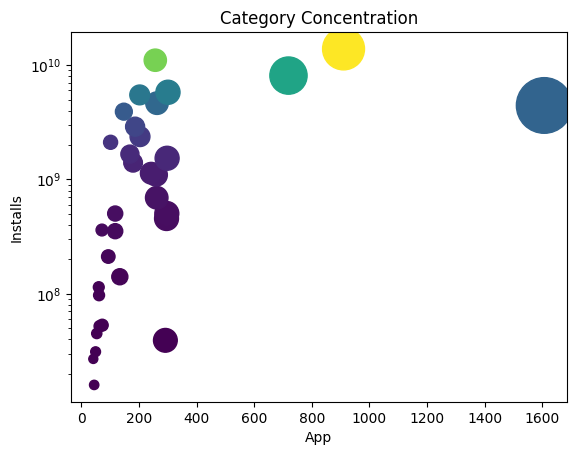

In [99]:
plt.scatter(category_installs['App'], # x-axis data
            category_installs['Installs'], # y-axis data
            s=category_installs['App'], # size of the points based on 'App' column
            c=category_installs['Installs']) # color of the points based on 'Installs' column

plt.yscale('log')
plt.title('Category Concentration')
plt.xlabel('App')
plt.ylabel('Installs')
plt.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [100]:

df['Genres'] = df['Genres'].str.split(';')
df = df.explode('Genres')
df['Genres'] = df['Genres'].str.split('&')
df = df.explode('Genres')
df['Genres'] = df['Genres'].str.split(' ')
df = df.explode('Genres')
print(df.Genres.value_counts())
dfgenre = pd.DataFrame(df.Genres.value_counts())

Genres
                 3116
Tools             719
Education         587
Entertainment     498
Action            400
                 ... 
Casino             37
Creativity         31
Trivia             28
Word               22
Audio               1
Name: count, Length: 67, dtype: int64


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [101]:

dfgenre = dfgenre.reset_index()
dfgenre = dfgenre.drop(0)[:15]
print(dfgenre)
bar = px.bar(x=dfgenre.Genres, y=dfgenre['count'],             
             title='Top Genres',
             hover_name=dfgenre.index,
             color=dfgenre['count'],
             color_continuous_scale='Agsunset')
bar.update_layout(xaxis_title='Genre',
    yaxis_title='Number of Apps',
    coloraxis_showscale=False)
bar.show()

             Genres  count
1             Tools    719
2         Education    587
3     Entertainment    498
4            Action    400
5      Productivity    301
6   Personalization    298
7         Lifestyle    298
8           Finance    296
9           Medical    292
10           Sports    270
11      Photography    263
12         Business    262
13    Communication    258
14          Fitness    245
15           Health    245


# Grouped Bar Charts: Free vs. Paid Apps per Category

In [102]:
df_apps_clean.Type.value_counts()
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

In [103]:
g_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group')
 
g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


In [104]:
box = px.box(df_apps_clean,
             y='Installs',
             x='Type',
             color='Type',
             notched=True,
             points='all',
             title='How Many Downloads are Paid Apps Giving Up?')
 
box.update_layout(yaxis=dict(type='log'))
 
box.show()

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

In [105]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']
box = px.box(df_paid_apps, 
             x='Category', 
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))
 
 
box.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [106]:
box = px.box(df_paid_apps,
             x='Category',
             y="Price",
             title='Price per Category')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))
 
box.show()